# Example of Calculating Synthetic Reciever Function 

This notebook demonstrates calculation of synthetic receiver functions based on [rfsed](https://github.com/akinremisa/rfsed) package

The required functions are first imported

In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
from rfsed.synrf import synrf
from rfsed.util import save_plot

The Earth model and the synthetic receiver function data parameters are defined

In [2]:
depth = np.array([2, 35, 77.5])
vp = np.array([2.0, 6.5, 8.045])
vs = np.array([1.36, 3.75, 4.485])
rho=np.array([2.72, 2.92, 3.3455])
preonset=5
n=2100
rayp=0.04
gaussian=1.25
delta=0.025

The synthetic receiver function is calculated using synrf

In [3]:
Synth=synrf(depth, vp, vs, rho, rayp, dt=delta, npts=n, ipha=1)
Synth.run_fwd()
Synth.filter(freqmin=0.05, freqmax=1.25, order=2, zerophase=True)
rf_synth=Synth.run_deconvolution(pre_filt=[0.05, 1.25], preonset=preonset, gaussian=gaussian)
trdata=(rf_synth[0]).data

The synthetic receiver function is visualised and saved

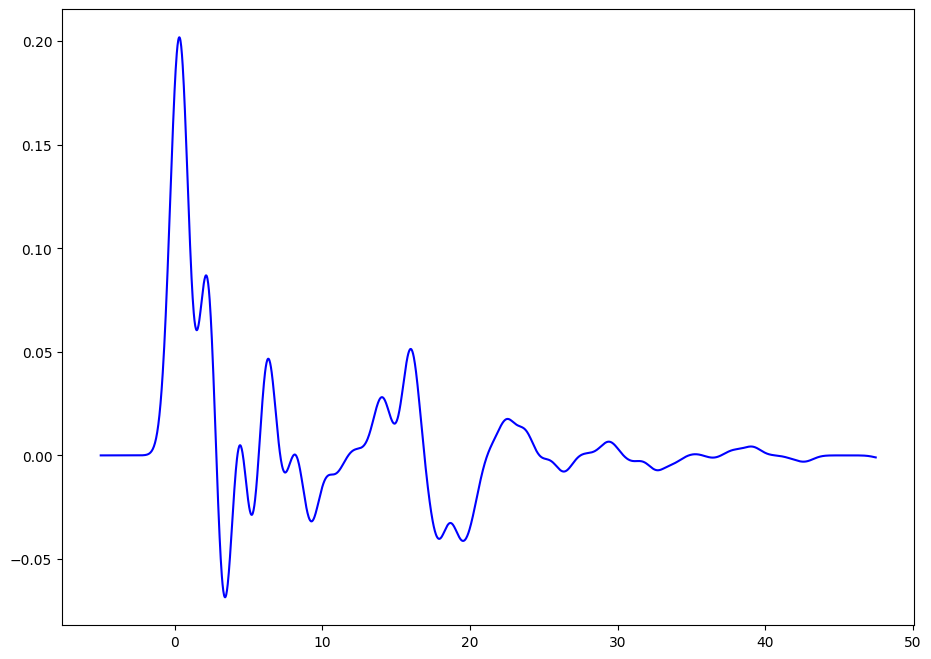

In [4]:
tlen = len(trdata)
t = np.arange(0, tlen)
t = (delta *  t) - preonset # shift the time axis
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)
ax1.plot(t, trdata, color = 'blue')
savedir=save_plot()
savepath = savedir + '/Example_SyntheticRF/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)
savepath=savepath + 'SyntheticRF.jpeg'
plt.savefig(savepath , format='jpeg', transparent=False,\
            dpi=250, bbox_inches = 'tight', pad_inches=0.1)